In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


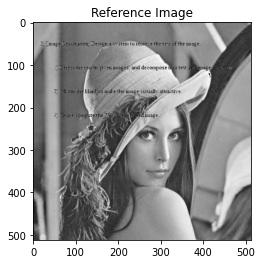

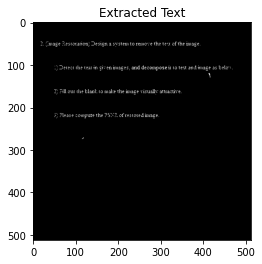

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2 

def RGBtoGRAY(image):
  return np.dot(image[...,:3], [0.3, 0.5, 0.2])


imagec = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lena(10).bmp')# My reference Image
imagec2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lena(10).bmp')# My reference Image
image=RGBtoGRAY(imagec)
imageg=imagec[:,:,1]
imagec_copy=imagec2
imageg_copy=imagec_copy[:,:,1]


green_threshold=0.9

m,n=np.shape(imageg)
for x in range(m):
  for y in range(n):
    if imageg[x,y]/np.max(imageg)>green_threshold:
      imageg[x,y]=np.max(imageg)
      image[x,y]=0
    else:
      imageg[x,y]=0

plt.figure()
plt.title('Reference Image')
plt.imshow(image,cmap='gray')
plt.figure()
plt.title('Extracted Text')
plt.imshow(imageg,cmap='gray')


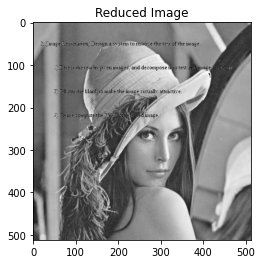

In [ ]:
plt.figure()
plt.title('Reduced Image')
plt.imshow(image,cmap='gray')

In [ ]:
def bilinear_interpolate(im, x, y):
    x = np.asarray(x)
    y = np.asarray(y)

    x0 = np.floor(x).astype(int)
    x1 = x0 + 1
    y0 = np.floor(y).astype(int)
    y1 = y0 + 1

    x0 = np.clip(x0, 0, im.shape[1]-1);
    x1 = np.clip(x1, 0, im.shape[1]-1);
    y0 = np.clip(y0, 0, im.shape[0]-1);
    y1 = np.clip(y1, 0, im.shape[0]-1);

    Ia = im[ y0, x0 ]
    Ib = im[ y1, x0 ]
    Ic = im[ y0, x1 ]
    Id = im[ y1, x1 ]

    wa = (x1-x) * (y1-y)
    wb = (x1-x) * (y-y0)
    wc = (x-x0) * (y1-y)
    wd = (x-x0) * (y-y0)

    return wa*Ia + wb*Ib + wc*Ic + wd*Id


def gauss_kernel(K,std):
    left_lim=-2
    right_lim=2
    delta=(right_lim-left_lim)/K
    x = np.arange(left_lim, right_lim, delta)
    y = np.arange(left_lim,right_lim, delta)
    x2d, y2d = np.meshgrid(x, y)
    gauss_kernel = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * std ** 2))
    norm_gauss_kernel = gauss_kernel / (2 * np.pi * std ** 2)      # normalized
    return norm_gauss_kernel
def convolve2D(image, kernel,padding=0):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) ) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding)) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by one pixel
        if y % 1 == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by one pixel
                    if x % 1 == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output




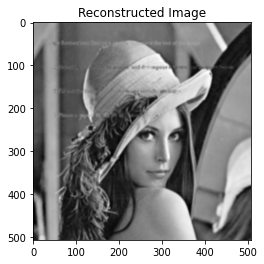

In [ ]:
m,n=np.shape(imageg)
reconstructed_image=np.zeros((m,n))
x_list=[]
y_list=[]
for x in range(n):
  for y in range(m):
    if imageg[x,y]/np.max(imageg)>0.6:
      x_list.append(x)
      y_list.append(y)
      reconstructed_image[x,y]=bilinear_interpolate(image, x, y)
    else:
      reconstructed_image[x,y]=image[x,y]
K=6
std=1
padding=0
filter=gauss_kernel(K,std)
reconstructed_image_treated=convolve2D(reconstructed_image, filter,padding)
plt.figure()
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image_treated,cmap='gray')

In [ ]:
imagec = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lena.bmp')# My reference Image

In [ ]:
def RGBtoGRAY(image):
    return np.dot(image[...,:3], [0.3, 0.5, 0.2])


def psnr(image1,image2,idx=1):
    if idx==1:
      PIXEL_MAX = 255.0
      return 20 * math.log10(PIXEL_MAX / math.sqrt(np.mean( (image1 - image2) ** 2 )))
    else:
      PIXEL_MAX = 255.0
      return 20 * math.log10(PIXEL_MAX / math.sqrt(np.mean( (image1[0:507,0:507] - image2[0:507,0:507]) ** 2 )))

In [ ]:
image=RGBtoGRAY(imagec)
image=image[:507,:507]


print("PSNR: ",psnr(image,reconstructed_image_treated))

PSNR:  5.948561891085853
